## 2D deep beam
<img src="2D Beam.JPG" width="600" height="600">

In [1]:
import sympy as sym
from sympy import *
x = sym.Symbol('x')
z = sym.Symbol('z')
E = 5000
t = 25
v = 0.25
L = 5000
f_0 = 1000
d = sym.Symbol('d')
U_x = Function('U_x')(z)
U_z = Function('U_z')(z)
alpha = 3*3.1428 / L


# ux(x, z) -> Ux(z)*sin(alpha*x)
u_x = U_x*sin(alpha*x)

# uz(x, z) -> Uz(z)*cos(alpha*x)
u_z = U_z*cos(alpha*x)

f = f_0 * cos(alpha*x)

In [2]:
u_x

U_x(z)*sin(0.00188568*x)

In [3]:
u_z

U_z(z)*cos(0.00188568*x)

In [4]:
u_x_xx = diff(u_x,x,x)
u_x_xx

-3.5557890624e-6*U_x(z)*sin(0.00188568*x)

In [5]:
u_x_zz = diff(u_x,z,z)
u_x_zz

sin(0.00188568*x)*Derivative(U_x(z), (z, 2))

In [6]:
u_z_zz = diff(u_z,z,z)
u_z_zz 

cos(0.00188568*x)*Derivative(U_z(z), (z, 2))

In [7]:
u_z_xx = diff(u_z,x,x)
u_z_xx 

-3.5557890624e-6*U_z(z)*cos(0.00188568*x)

In [8]:
u_x_xz = diff(u_x,x,z)
u_x_xz

0.00188568*cos(0.00188568*x)*Derivative(U_x(z), z)

In [9]:
u_z_zx = diff(u_z,z,x)
u_z_zx

-0.00188568*sin(0.00188568*x)*Derivative(U_z(z), z)

In [10]:
PDE1 = Eq((E*t)/(1-v**2)*(u_x_xx + u_x_zz*(1-v)/2 + u_z_zx*(1+v)/2 ),0)
PDE1

Eq(-0.47410520832*U_x(z)*sin(0.00188568*x) + 50000.0*sin(0.00188568*x)*Derivative(U_x(z), (z, 2)) - 157.14*sin(0.00188568*x)*Derivative(U_z(z), z), 0)

In [11]:
PDE2 = Eq((E*t)/(1-v**2)*(u_z_zz + u_z_xx*(1-v)/2 + u_x_xz*(1+v)/2 ),0)
PDE2

Eq(-0.17778945312*U_z(z)*cos(0.00188568*x) + 157.14*cos(0.00188568*x)*Derivative(U_x(z), z) + 133333.333333333*cos(0.00188568*x)*Derivative(U_z(z), (z, 2)), 0)

In [12]:
U_x, U_z =  dsolve([PDE1,PDE2], [U_x,U_z])

In [13]:
U_x

Eq(U_x(z), 0.00188568*C1*z/exp(-0.00188568*z)**1.0 + 0.00188568*C2*z*exp(-0.00188568*z) + (1.2*C1 + 0.00188568*C4)/exp(-0.00188568*z)**1.0 - (1.2*C2 - 0.00188568*C3)*exp(-0.00188568*z))

In [14]:
U_z

Eq(U_z(z), -0.00188568*C1*z/exp(-0.00188568*z)**1.0 + 0.00188568*C2*z*exp(-0.00188568*z) + (1.0*C1 - 0.00188568*C4)/exp(-0.00188568*z)**1.0 + (1.0*C2 + 0.00188568*C3)*exp(-0.00188568*z))

Now we redefine $u_x(x,z)$ and $u_z(x,z)$ to be able to introduce the BCs.

In [15]:
u_x = U_x.rhs*sin(alpha*x)
u_z = U_z.rhs*cos(alpha*x)

In [16]:
sigma_xx = E/(1-v**2) * (diff(u_x,x) + v*diff(u_z,z))
sigma_zz = E/(1-v**2) * (diff(u_z,z) + v*diff(u_x,x))
sigma_xz = E/(1+v) * (diff(u_x,z) + diff(u_z,x))
sigma_zz 

2.51424*(0.00188568*C1*z/exp(-0.00188568*z)**1.0 + 0.00188568*C2*z*exp(-0.00188568*z) + (1.2*C1 + 0.00188568*C4)/exp(-0.00188568*z)**1.0 - (1.2*C2 - 0.00188568*C3)*exp(-0.00188568*z))*cos(0.00188568*x) + 5333.33333333333*(-3.5557890624e-6*C1*z/exp(-0.00188568*z)**1.0 - 0.00188568*C1/exp(-0.00188568*z)**1.0 - 3.5557890624e-6*C2*z*exp(-0.00188568*z) + 0.00188568*C2*exp(-0.00188568*z) + 0.00188568*(1.0*C1 - 0.00188568*C4)/exp(-0.00188568*z)**1.0 - 0.00188568*(1.0*C2 + 0.00188568*C3)*exp(-0.00188568*z))*cos(0.00188568*x)

In [17]:
eq1 = Eq(sigma_zz.subs(z,-d/2),f)
eq1

Eq(2.51424*(-0.00094284*C1*d/exp(0.00094284*d)**1.0 - 0.00094284*C2*d*exp(0.00094284*d) + (1.2*C1 + 0.00188568*C4)/exp(0.00094284*d)**1.0 - (1.2*C2 - 0.00188568*C3)*exp(0.00094284*d))*cos(0.00188568*x) + 5333.33333333333*(1.7778945312e-6*C1*d/exp(0.00094284*d)**1.0 - 0.00188568*C1/exp(0.00094284*d)**1.0 + 1.7778945312e-6*C2*d*exp(0.00094284*d) + 0.00188568*C2*exp(0.00094284*d) + 0.00188568*(1.0*C1 - 0.00188568*C4)/exp(0.00094284*d)**1.0 - 0.00188568*(1.0*C2 + 0.00188568*C3)*exp(0.00094284*d))*cos(0.00188568*x), 1000*cos(0.00188568*x))

In [18]:
eq2 = Eq(sigma_xz.subs(z,-d/2),0)
eq2

Eq(-7.54272*(0.00094284*C1*d/exp(0.00094284*d)**1.0 - 0.00094284*C2*d*exp(0.00094284*d) + (1.0*C1 - 0.00188568*C4)/exp(0.00094284*d)**1.0 + (1.0*C2 + 0.00188568*C3)*exp(0.00094284*d))*sin(0.00188568*x) + 4000.0*(-1.7778945312e-6*C1*d/exp(0.00094284*d)**1.0 + 0.00188568*C1/exp(0.00094284*d)**1.0 + 1.7778945312e-6*C2*d*exp(0.00094284*d) + 0.00188568*C2*exp(0.00094284*d) + 0.00188568*(1.2*C1 + 0.00188568*C4)/exp(0.00094284*d)**1.0 + 0.00188568*(1.2*C2 - 0.00188568*C3)*exp(0.00094284*d))*sin(0.00188568*x), 0)

In [19]:
eq3 = Eq(sigma_zz.subs(z,d/2),0)
eq3

Eq(2.51424*(0.00094284*C1*d/exp(-0.00094284*d)**1.0 + 0.00094284*C2*d*exp(-0.00094284*d) + (1.2*C1 + 0.00188568*C4)/exp(-0.00094284*d)**1.0 - (1.2*C2 - 0.00188568*C3)*exp(-0.00094284*d))*cos(0.00188568*x) + 5333.33333333333*(-1.7778945312e-6*C1*d/exp(-0.00094284*d)**1.0 - 0.00188568*C1/exp(-0.00094284*d)**1.0 - 1.7778945312e-6*C2*d*exp(-0.00094284*d) + 0.00188568*C2*exp(-0.00094284*d) + 0.00188568*(1.0*C1 - 0.00188568*C4)/exp(-0.00094284*d)**1.0 - 0.00188568*(1.0*C2 + 0.00188568*C3)*exp(-0.00094284*d))*cos(0.00188568*x), 0)

In [20]:
eq4 = Eq(sigma_xz.subs(z,d/2),0)
eq4

Eq(-7.54272*(-0.00094284*C1*d/exp(-0.00094284*d)**1.0 + 0.00094284*C2*d*exp(-0.00094284*d) + (1.0*C1 - 0.00188568*C4)/exp(-0.00094284*d)**1.0 + (1.0*C2 + 0.00188568*C3)*exp(-0.00094284*d))*sin(0.00188568*x) + 4000.0*(1.7778945312e-6*C1*d/exp(-0.00094284*d)**1.0 + 0.00188568*C1/exp(-0.00094284*d)**1.0 - 1.7778945312e-6*C2*d*exp(-0.00094284*d) + 0.00188568*C2*exp(-0.00094284*d) + 0.00188568*(1.2*C1 + 0.00188568*C4)/exp(-0.00094284*d)**1.0 + 0.00188568*(1.2*C2 - 0.00188568*C3)*exp(-0.00094284*d))*sin(0.00188568*x), 0)

In [21]:
u_x.free_symbols

{C1, C2, C3, C4, x, z}

In [22]:
parameters = u_x.free_symbols - set([alpha, v, x, z, f_0])
parameters

{C1, C2, C3, C4}

In [23]:
sol_params = solve([eq1, eq2, eq3, eq4], parameters)
sol_params

{C1: 7.8954355738057e+43*d**7*exp(0.00754272*d)/(2.24596027649777e+39*d**8*exp(0.00659988*d) + 1.0719550766026e+42*d**7*exp(0.00659988*d) + 1.78659179433767e+42*d**7*exp(0.01037124*d) - 1.57908711476114e+44*d**6*exp(0.00282852*d) + 1.24432064643178e+45*d**6*exp(0.00659988*d) - 3.47399165247451e+44*d**6*exp(0.01037124*d) + 4.73726134428342e+44*d**6*exp(0.0141426*d) - 7.53668916934488e+46*d**5*exp(0.00282852*d) + 2.753403776534e+47*d**5*exp(0.00659988*d) + 3.81858917913474e+47*d**5*exp(0.01037124*d) - 4.52201350160693e+47*d**5*exp(0.0141426*d) + 4.18704953852494e+46*d**5*exp(0.01791396*d) - 6.52810956432868e+49*d**4*exp(0.00282852*d) + 2.48334616896095e+50*d**4*exp(0.00659988*d) - 2.50999151412148e+50*d**4*exp(0.01037124*d) + 1.54543001931046e+50*d**4*exp(0.0141426*d) - 8.6597371771707e+49*d**4*exp(0.01791396*d) - 1.75923034262727e+52*d**3*exp(0.00282852*d) + 3.42661331796878e+52*d**3*exp(0.00659988*d) + 2.98150684573778e+52*d**3*exp(0.01037124*d) - 9.50031486232719e+52*d**3*exp(0.014142

In [31]:
d

d

In [24]:
u_x = u_x.subs(sol_params)
u_x = u_x.subs({d : 5000})
u_x
u_z = u_z.subs(sol_params)
u_z = u_z.subs({d : 5000})
u_z


(3.57929203816332e-6*z/exp(-0.00188568*z)**1.0 - 0.00224176464844764*z*exp(-0.00188568*z) - 0.0110839842356068/exp(-0.00188568*z)**1.0 - 7.50654817697734*exp(-0.00188568*z))*cos(0.00188568*x)

In [29]:
sigma_xx = E/(1-v**2) * (diff(u_x,x).subs({x : 0}) + v*diff(u_z,z).subs({x : 0}))

sigma_xx

-2.69975976420953e-5*z/exp(-0.00188568*z)**1.0 - 0.016909003049139*z*exp(-0.00188568*z) + 0.0463787523766977/exp(-0.00188568*z)**1.0 - 33.305438721595*exp(-0.00188568*z)

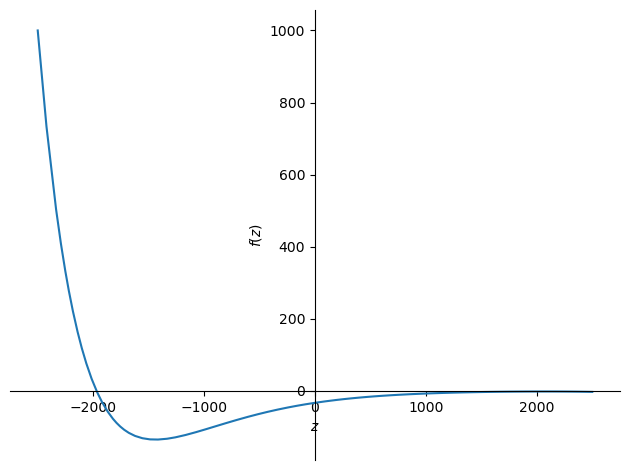

In [33]:
d_2 = 5000/2
plot(sigma_xx, (z, -d_2, d_2))

In [27]:
plot((z, -d_2, d_2), sigma_xx)

TypeError: 'NoneType' object is not iterable